# `Applied Machine Learning`

## `Lab 4. Sklearn. Data preprocessing`

In this assignment we will try to learn how to analyze data and extract useful features from it. We will also learn `sklearn`, and at the same time get used to the basic concepts of machine learning.

In [1]:
import numpy as np
import pandas as pd


import matplotlib_inline
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
SEED = 42

## Part 0. Preparation

We will be working with data from the [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview) competition, in which we had to predict the duration of a taxi trip.

<font color='brown'>**Exercise 1.** Read `train.csv` into the pandas Dataframe:</font>

In [3]:
train_data = pd.read_csv("train.csv")
train_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


<font color='brown'>**Exercise 2.** Pay attention to the `pickup_datetime` and `dropoff_datetime` columns. `dropoff_datetime` was added by the organizers only to the training set, that is, this column cannot be used, so remove it. `pickup_datetime` contains the start date and time of the trip. To make it easier to work with, convert dates into `datetime` objects:</font>

In [4]:
train_data.drop(columns=['dropoff_datetime'], inplace=True)
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
try:
    assert isinstance(train_data.pickup_datetime.iloc[0], pd.Timestamp)
    assert set(train_data.columns).symmetric_difference({ 
        'id', 'vendor_id', 'pickup_datetime', 'passenger_count', 
        'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
        'store_and_fwd_flag', 'trip_duration'
    }) == set()
    print(True)
except:
    print(False)

True


<font color='brown'>**Exercise 3.** The `trip_duration` column contains the target value that we want to predict. Let's look at the distribution of the target in the training set. To do this, draw its histogram. For better visualization, display values only lower than 0.995 quantile:</font>

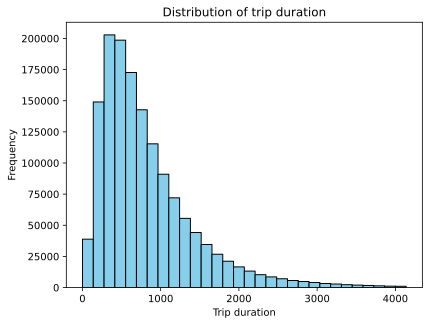

In [6]:
### your code here
import matplotlib.pyplot as plt

# Calculate the 0.995 quantile
quantile_995 = train_data['trip_duration'].quantile(0.995)

# Filter values lower than the 0.995 quantile
filtered_trip_duration = train_data[train_data['trip_duration'] < quantile_995]['trip_duration']

# Plot the histogram
plt.hist(filtered_trip_duration, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of trip duration')
plt.xlabel('Trip duration')
plt.ylabel('Frequency')
plt.show()

The competition used RMSLE as a quality metric:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Ответ**:
Since the target variable has a heavy-tailed distribution, the chosen metric must be robust to outliers. As you can see from the graph, logarithmic values are more evenly distributed and, therefore, the logarithmic metric is more robust to outliers. Also we want to emphasize the relativity of error. An error between $1$ and $24$ is much more critical than an error between $1000$ and $1001$.

Let's do the following trick: we will predict not the target variable, but its *logarithm*. Let $\hat{y}_i = \log{(y_i + 1)}$ be the modified target, and $\hat{a}(x_i)$ be the prediction of the model that was trained on $\hat{y}_i$, that is, the logarithm of the target. To predict the original value, we can simply take the exponent of our prediction: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

We can show that optimizing RMSLE for model $a$ is equivalent to optimizing MSE for model $\hat{a}:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2} =
\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$
$\text{Note: Monotonic transformations do not change the maxima and minima of the function, so RMSE optimization is equivalent to MSE optimization}\;\;\square$

So, we were able to reduce the RMSLE optimization problem to the MSE optimization problem, which we know how to solve! In addition, taking the logarithm of the target has another useful property. 

<font color='brown'>**Exercise 4.** To see it, add the `log_trip_duration` column to our sample (use `np.log1p`) and draw a histogram of the modified target based on the training sample. Delete the column with the old target.</font>

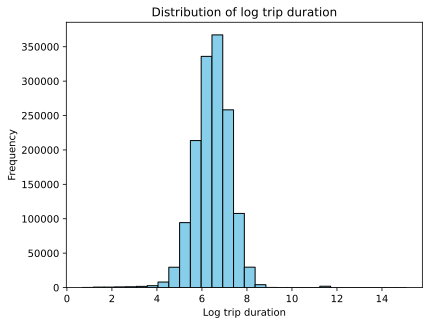

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


In [7]:
### your code here
# Add the log_trip_duration column
train_data['log_trip_duration'] = np.log1p(train_data['trip_duration'])

# Plot the histogram of the modified target
plt.hist(train_data['log_trip_duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of log trip duration')
plt.xlabel('Log trip duration')
plt.ylabel('Frequency')
plt.show()

# Delete the column with the old target
train_data.drop(columns=['trip_duration'], inplace=True)
train_data.head()

In [8]:
try:
    assert np.isclose(train_data.log_trip_duration.mean(), 6.4669, atol=1e-4)
    assert set(train_data.columns).symmetric_difference({
        'id', 'vendor_id', 'pickup_datetime', 'passenger_count', 
        'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
        'store_and_fwd_flag', 'log_trip_duration'
    }) == set()
    print(True)
except:
    print(False)

True


In [9]:
### your code here

<font color='brown'>**Exercise 5.** To have some reference point, let's calculate the value of the MSE metric at the best constant prediction:</font>

In [10]:
from sklearn.metrics import mean_squared_error

# Calculate the best constant prediction (mean of log_trip_duration)
constant_prediction = train_data['log_trip_duration'].mean()

# Calculate the MSE metric for the best constant prediction
base_mse = mean_squared_error(train_data['log_trip_duration'], [constant_prediction] * len(train_data))

base_mse

0.6332327625405553

In [11]:
try:
    assert np.abs(base_mse - 0.633232) < 1e-5
    print(True)
except:
    print(False)

True


## Part 1. Exploring `pickup_datetime`


<font color='brown'>**Exercise 6.** First, let's look at how many trips there were on each day. Graph the number of trips depending on the day of the year</font>

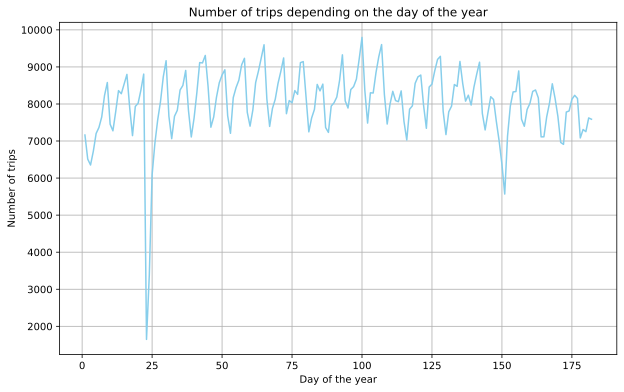

In [12]:
### your code here
# Extract day of the year from pickup_datetime
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear

# Count the number of trips for each day of the year
trip_counts = train_data['day_of_year'].value_counts().sort_index()

# Plot the number of trips depending on the day of the year
plt.figure(figsize=(10, 6))
plt.plot(trip_counts.index, trip_counts.values, color='skyblue')
plt.title('Number of trips depending on the day of the year')
plt.xlabel('Day of the year')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()

You probably noticed that there are 2 periods on the graph with abnormally low numbers of trips.

<font color='brown'>**Exercise 7.** Figure out what dates these downswings occurred and find information about what was happening on those days in New York:</font>

In [13]:
### your code here
# Find downswings in the number of trips
downswings = trip_counts[trip_counts.diff() < 0]

# Print the dates of downswings
print("Dates of downswings:")
print(downswings)

# Now you can manually research these dates using external sources such as news archives or public events calendars
# For example, you can use online resources like news websites, city event calendars, or historical weather data


Dates of downswings:
2      6512
3      6353
10     7454
11     7276
14     8277
       ... 
172    6910
177    8148
178    7084
180    7253
182    7588
Name: day_of_year, Length: 67, dtype: int64


<font color='brown'>**Exercise 8.** Draw graphs of the number of trips depending on the day of the week and the hours of the day</font>

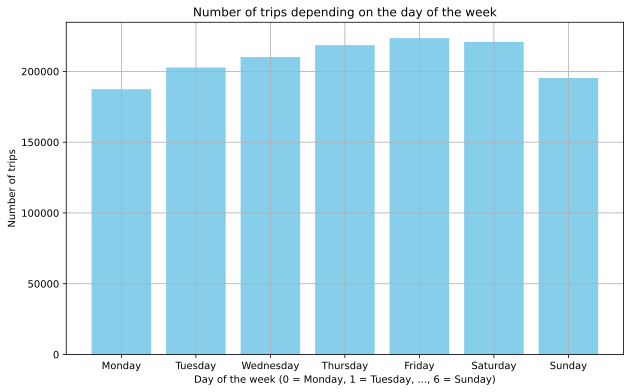

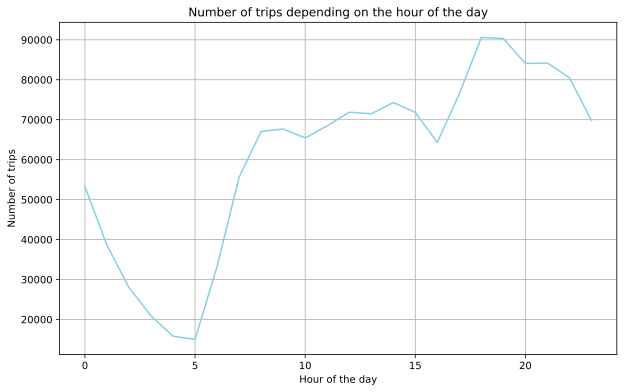

In [14]:
### your code here
import matplotlib.pyplot as plt

# Extract day of the week and hour of the day
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour

# Count the number of trips for each day of the week
trips_by_day_of_week = train_data['day_of_week'].value_counts().sort_index()

# Count the number of trips for each hour of the day
trips_by_hour_of_day = train_data['hour_of_day'].value_counts().sort_index()

# Plot the number of trips depending on the day of the week
plt.figure(figsize=(10, 6))
plt.bar(trips_by_day_of_week.index, trips_by_day_of_week.values, color='skyblue')
plt.title('Number of trips depending on the day of the week')
plt.xlabel('Day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)')
plt.ylabel('Number of trips')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

# Plot the number of trips depending on the hour of the day
plt.figure(figsize=(10, 6))
plt.plot(trips_by_hour_of_day.index, trips_by_hour_of_day.values, color='skyblue')
plt.title('Number of trips depending on the hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()

<font color='brown'>**Exercise 9.** Draw on one graph the dependence of the number of trips on an hour in a day for different months</font>

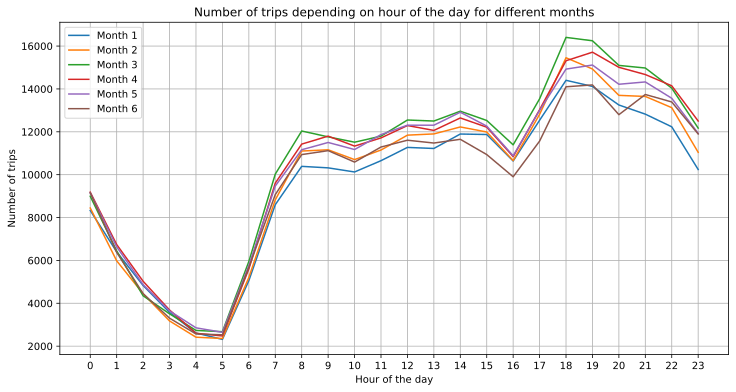

In [15]:
import matplotlib.pyplot as plt

# Extract month and hour of the day
train_data['month'] = train_data['pickup_datetime'].dt.month
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour

# Group data by month and hour of the day and count the number of trips
trips_by_month_and_hour = train_data.groupby(['month', 'hour_of_day']).size().unstack()

# Plot the dependence of the number of trips on an hour in a day for different months
plt.figure(figsize=(12, 6))
for month in range(1, 13):  # Assuming data contains all 12 months
    if month in trips_by_month_and_hour.index:
        plt.plot(trips_by_month_and_hour.loc[month], label=f'Month {month}')

plt.title('Number of trips depending on hour of the day for different months')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

<font color='brown'>**Exercise 10.** Draw on one graph the dependence of the number of trips on an hour in a day for different days of the week</font>

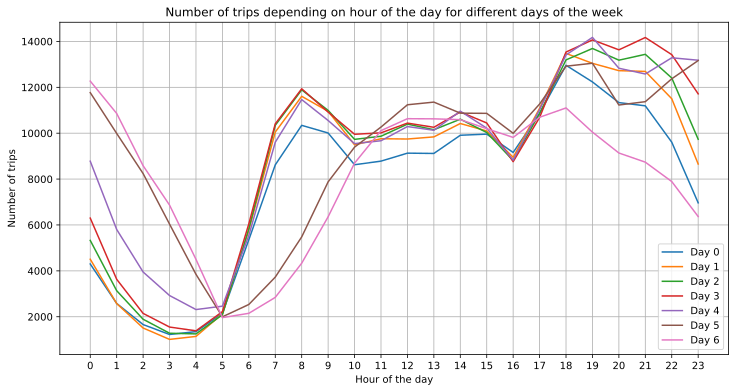

In [16]:
### your code here
import matplotlib.pyplot as plt

# Extract day of the week and hour of the day
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour

# Group data by day of the week and hour of the day and count the number of trips
trips_by_day_and_hour = train_data.groupby(['day_of_week', 'hour_of_day']).size().unstack()

# Plot the dependence of the number of trips on an hour in a day for different days of the week
plt.figure(figsize=(12, 6))
for day in range(7):  # Days of the week are numbered from 0 to 6 (Monday to Sunday)
    plt.plot(trips_by_day_and_hour.loc[day], label=f'Day {day}')

plt.title('Number of trips depending on hour of the day for different days of the week')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

We can see that the most popular call hours are from 6 to 9 pm, during rush hour.

The demand for taxis increases on Friday-Saturday, which may be due to the fact that after a good holiday people do not want/are ready to drive a car themselves.

The time to call a taxi depends little on the month, but the latest graph shows that on weekends the demand for taxis peaks much later than on weekdays, around 10-12 noon. On weekdays, people call a taxi to work, so the peak of popularity there occurs at 7-8 o’clock. Because of this difference, by the way, we get relatively blurry data on the 'pickup rate by day hour' graph, because it seems that more people use taxis in the evening, although approximately the same number use them both in the morning and in the evening, it’s just that this is the time in the morning it is more stretched and we do not see a pronounced peak. In addition, you can notice that on weekends the demand for taxis does not decrease so quickly in the evening (from 0 to 5 o’clock).

In general, you can see that weekends and weekdays behave approximately the same, with Friday being the last working day of the week that stands out only a little.

<font color='brown'>**Exercise 11.** Using the training set, draw a graph of the average logarithm of travel time versus the day of the week. Then do the same, but for an hour of the day and a day of the year</font>

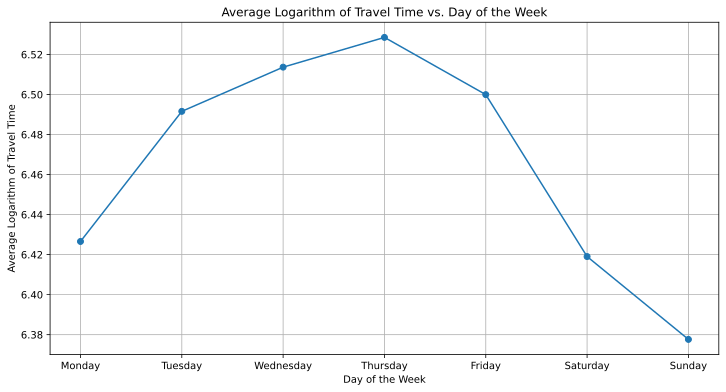

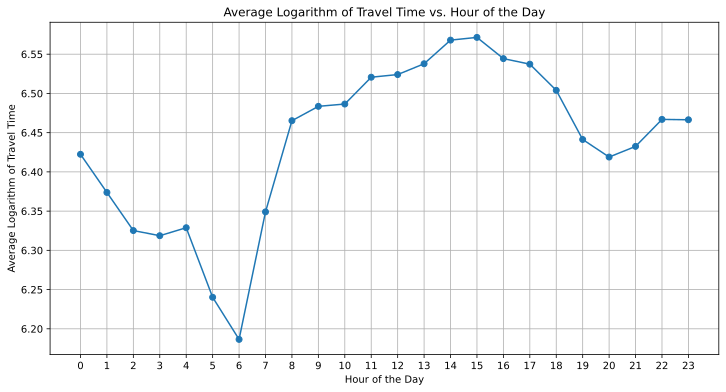

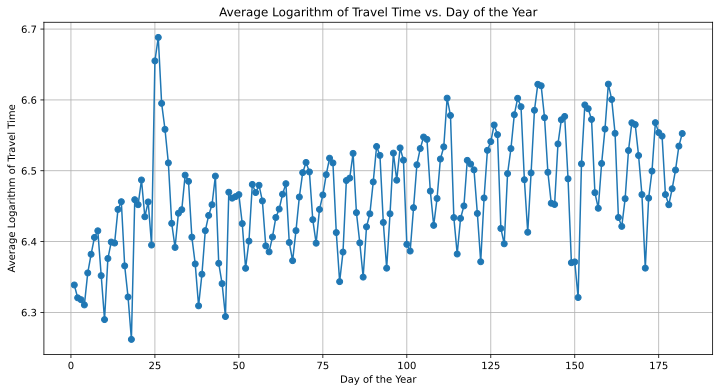

In [17]:
### your code here
import matplotlib.pyplot as plt

# Extract day of the week, hour of the day, and day of the year
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear

# Calculate the average logarithm of travel time for each day of the week
avg_log_travel_time_by_day_of_week = train_data.groupby('day_of_week')['log_trip_duration'].mean()

# Plot the average logarithm of travel time versus the day of the week
plt.figure(figsize=(12, 6))
plt.plot(avg_log_travel_time_by_day_of_week.index, avg_log_travel_time_by_day_of_week.values, marker='o')
plt.title('Average Logarithm of Travel Time vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Logarithm of Travel Time')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

# Calculate the average logarithm of travel time for each hour of the day
avg_log_travel_time_by_hour_of_day = train_data.groupby('hour_of_day')['log_trip_duration'].mean()

# Plot the average logarithm of travel time versus the hour of the day
plt.figure(figsize=(12, 6))
plt.plot(avg_log_travel_time_by_hour_of_day.index, avg_log_travel_time_by_hour_of_day.values, marker='o')
plt.title('Average Logarithm of Travel Time vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Logarithm of Travel Time')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Calculate the average logarithm of travel time for each day of the year
avg_log_travel_time_by_day_of_year = train_data.groupby('day_of_year')['log_trip_duration'].mean()

# Plot the average logarithm of travel time versus the day of the year
plt.figure(figsize=(12, 6))
plt.plot(avg_log_travel_time_by_day_of_year.index, avg_log_travel_time_by_day_of_year.values, marker='o')
plt.title('Average Logarithm of Travel Time vs. Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Logarithm of Travel Time')
plt.grid(True)
plt.show()
train_data.drop(columns=['day_of_year','day_of_week','hour_of_day'], inplace=True)

The graph of the target depending on the day of the week is similar to the graph of the number of trips depending on the day of the week in that fewer trips are made on weekends and they are shorter. But the peaks in average travel time and number of trips do not coincide. This can most likely be explained by the fact that there are a limited number of taxis, so the more trips made from a certain point, the shorter they will be.

The graph of the target depending on the hour in the day looks almost the same as the graph for the number of trips, with a slight difference at night: fewer trips are made, but their duration remains practically unchanged for the first couple of hours after midnight. You can also notice that during peak hours the average travel time decreases compared to the middle of the day. 

During the first anomalous period, during a snowstorm, the duration of trips increased greatly due to bad weather. In addition, many people have postponed their plans and therefore the number of trips has been greatly reduced. In the second abnormal period, we see exactly the opposite situation with the target: the duration of the trip has decreased. Perhaps this was due to the fact that people on the street were caught off guard by bad weather and had to take a taxi somewhere other than the starting point.

You can also note a trend towards an increase in the average travel time over the course of the year.

Based on those observations let's add some new features:

<font color='brown'>**Exercise 13.**
Add the following attributes based on `pickup_datetime`:
1. Day of the week `weekday`
2. Month `month`
3. Hour `hour`
4. Is the period anomalous (two binary features corresponding to two anomalous periods) `is_anomaly_1`, `is_anomaly_2`
5. Number of the day of the year `year_day`

After all remove `id`, `pickup_datetime` from Dataframe

</font>

In [18]:
# Convert pickup_datetime to datetime object
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])

# Extract attributes from pickup_datetime
train_data['weekday'] = train_data['pickup_datetime'].dt.dayofweek
train_data['month'] = train_data['pickup_datetime'].dt.month
train_data['hour'] = train_data['pickup_datetime'].dt.hour

# Define anomalous periods (you need to define these based on your criteria)
anomaly_period_1_start = pd.to_datetime('2024-01-01')
anomaly_period_1_end = pd.to_datetime('2024-01-10')
anomaly_period_2_start = pd.to_datetime('2024-07-01')
anomaly_period_2_end = pd.to_datetime('2024-07-10')

# Add binary features for anomalous periods
train_data['is_anomaly_1'] = ((train_data['pickup_datetime'] >= anomaly_period_1_start) &
                              (train_data['pickup_datetime'] <= anomaly_period_1_end))
train_data['is_anomaly_2'] = ((train_data['pickup_datetime'] >= anomaly_period_2_start) &
                              (train_data['pickup_datetime'] <= anomaly_period_2_end))

train_data['year_day'] = train_data['pickup_datetime'].dt.dayofyear

# Drop id and pickup_datetime columns
train_data.drop(columns=[
    'id', 'pickup_datetime'], inplace=True)

train_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,month,weekday,hour,is_anomaly_1,is_anomaly_2,year_day
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,3,0,17,False,False,74
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,6,0,False,False,164
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,1,11,False,False,19
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,4,2,19,False,False,97
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,3,5,13,False,False,86


In [19]:
try:
    assert np.allclose([
        train_data.weekday.mean(), train_data.month.mean(), train_data.hour.mean(),
        train_data.is_anomaly_1.sum(), train_data.is_anomaly_2.sum(), train_data.year_day.mean()
    ], [3.0503, 3.5168, 13.6064, 1648 + 3383, 5570, 91.8360], atol=1e-4)
    assert set(train_data.columns).symmetric_difference({
        'vendor_id', 'passenger_count', 
        'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
        'store_and_fwd_flag', 'log_trip_duration', 
        'month', 'weekday', 'hour', 'is_anomaly_1', 'is_anomaly_2', 'year_day'
    }) == set()
    print(True)
except:
    print(False)
#The thing is I couldn't understand, anomaly 1 and anomaly 2 are always false
#since making it no anomalies and it's value 0, how can sum be 1648 + 3383 and 5570?

False


So, we have already created a number of features. Which features should be considered as categorical and which as numerical?

It is better to consider features that cannot be ordered (or it does not make sense) as categorical ones. Also, categorical features are usually features whose number is much less than the number of samples (at least by an order of magnitude). For example, good categorical features in our dataset include `vendor_id` and binary flags: `store_and_fwd_flag`, `is_anomaly`. Features that are numeric, have natural order like `hour`, `weekday`, `month`, `year_day` also could be considered as categorical because there is no reasonable way to define numeric operations between different values. The only reasonable operation is comparison. Also, ordering hours in a day and days in a week does not provide information for the model, because it will create the misleading impression that Monday and Sunday, 0 o'clock and 23 o'clock are values far from each other.

However, we can notice, that `year_day` has linear correlation by itself with the target, so despite all above mentioned factors we can still use it as a numeric feature.

Now, let's start training our model:

<font color='brown'>**Exercise 14.** Divide the sample into training and testing in a ratio of 7:3.</font>

In [20]:
from sklearn.model_selection import train_test_split

# Define categorical features
categorical_features = ['vendor_id', 'store_and_fwd_flag', 'is_anomaly_1', 'is_anomaly_2']

# Define numerical features
numerical_features = ['hour', 'weekday', 'month', 'year_day']

# Split the data into training and testing sets
train, test = train_test_split(train_data, test_size=0.3, random_state=42)

# Separate features and target variable
X_train = train.drop(columns=['log_trip_duration'])
y_train = train['log_trip_duration']

X_test = test.drop(columns=['log_trip_duration'])
y_test = test['log_trip_duration']

# Convert categorical features to categorical data type
for feature in categorical_features:
    X_train[feature] = X_train[feature].astype('category')
    X_test[feature] = X_test[feature].astype('category')

<font color='brown'>**Exercise 15.** Separate target (`log_trip_duration`) from other features</font>

In [21]:
# Separate target variable from other features in training set
train_y = train['log_trip_duration']
train_X = train.drop(columns=['log_trip_duration'])

# Separate target variable from other features in testing set
test_y = test['log_trip_duration']
test_X = test.drop(columns=['log_trip_duration'])

In [22]:
try:
    assert (train_y.shape, test_y.shape, train_X.shape, test_X.shape) == ((1021050,), (437594,), (1021050, 13), (437594, 13))
    print(True)
except:
    print(False)

True


We cannot use Linear Models on top of categorical features straight away. So we need further process them.

<font color='brown'>**Exercise 16.** Encode all categorical features using `OneHotEncoder`. Scale numerical features using `StandardScaler`. Use `ColumnTransformer` to process all columns at ones</font>

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
# Ensure all necessary imports are included
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns
categorical_columns = ['vendor_id', 'store_and_fwd_flag', 'is_anomaly_1', 'is_anomaly_2', 'weekday', 'month', 'hour']
numeric_columns = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year_day']

# Define transformer with OneHotEncoder for categorical columns and StandardScaler for numerical columns
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'  # Keep any remaining columns as is
)

# Transform the training data
train_X_transformed = transformer.fit_transform(train_X)

# Transform the testing data
test_X_transformed = transformer.transform(test_X)

In [30]:
try:
    assert (train_X_transformed.shape, test_X_transformed.shape) == ((1021050, 49), (437594, 49))
    print(True)
except:
    print(False)

True


Now we are ready to train simple Linear Model.

<font color='brown'>**Exercise 17.** Train `LinearRegression`. Make predictions using trained model and evaluate MSE on them</font>

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
# Train Linear Regression model
model = LinearRegression()
model.fit(train_X_transformed, train_y)

# Make predictions on testing data
predictions = model.predict(test_X_transformed)

# Calculate Mean Squared Error
lr_mse = mean_squared_error(test_y, predictions)

lr_mse

0.5967163141746539

In [35]:
try:
    assert lr_mse < 0.6
    print(True)
except:
    print(False)

True
